In [21]:
import base64
import collections
import datetime
import itertools
import json
import math
import os
import operator
import pickle
import random
import re
import sys
import time

import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
import scipy
import seaborn as sns
import sklearn
from sklearn import *
import statsmodels as sm
import tensorflow as tf


np.random.seed(1337)

%matplotlib inline

sns.set(font_scale=1.3)
mpl.rcParams['figure.figsize'] = 20, 12
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))

linewidth = 1.0
dotsize = 15

In [2]:
from keras.datasets import imdb

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
train_data[0][:10]

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print decoded_review

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [12]:
model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['accuracy'])

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s - loss: 0.5134 - acc: 0.7907 - val_loss: 0.4040 - val_acc: 0.8619
Epoch 2/20
15000/15000 [==============================] - 0s - loss: 0.3140 - acc: 0.9023 - val_loss: 0.3143 - val_acc: 0.8852
Epoch 3/20
15000/15000 [==============================] - 0s - loss: 0.2332 - acc: 0.9242 - val_loss: 0.2811 - val_acc: 0.8919
Epoch 4/20
15000/15000 [==============================] - 0s - loss: 0.1822 - acc: 0.9426 - val_loss: 0.2728 - val_acc: 0.8906
Epoch 5/20
15000/15000 [==============================] - 0s - loss: 0.1504 - acc: 0.9512 - val_loss: 0.2772 - val_acc: 0.8885
Epoch 6/20
15000/15000 [==============================] - 0s - loss: 0.1216 - acc: 0.9631 - val_loss: 0.3200 - val_acc: 0.8784
Epoch 7/20
15000/15000 [==============================] - 0s - loss: 0.1040 - acc: 0.9691 - val_loss: 0.3010 - val_acc: 0.8845
Epoch 8/20
15000/15000 [==============================] - 0s 

In [15]:
history_dict = history.history
history_dict.keys()

['acc', 'loss', 'val_acc', 'val_loss']

In [16]:
history_dict['loss']

[0.51339440757433574,
 0.31399499934514363,
 0.23315528160730997,
 0.18219214719136556,
 0.15041739975611368,
 0.12162097860972086,
 0.10398628455797831,
 0.085398030563195546,
 0.073326250648498528,
 0.058682085728645327,
 0.048829795674482979,
 0.038835862344503404,
 0.030596310055255888,
 0.024482772547006607,
 0.02024068110783895,
 0.014400092280407747,
 0.012159406872093678,
 0.0073534386386473975,
 0.0069916286773979664,
 0.0058068005190541347]

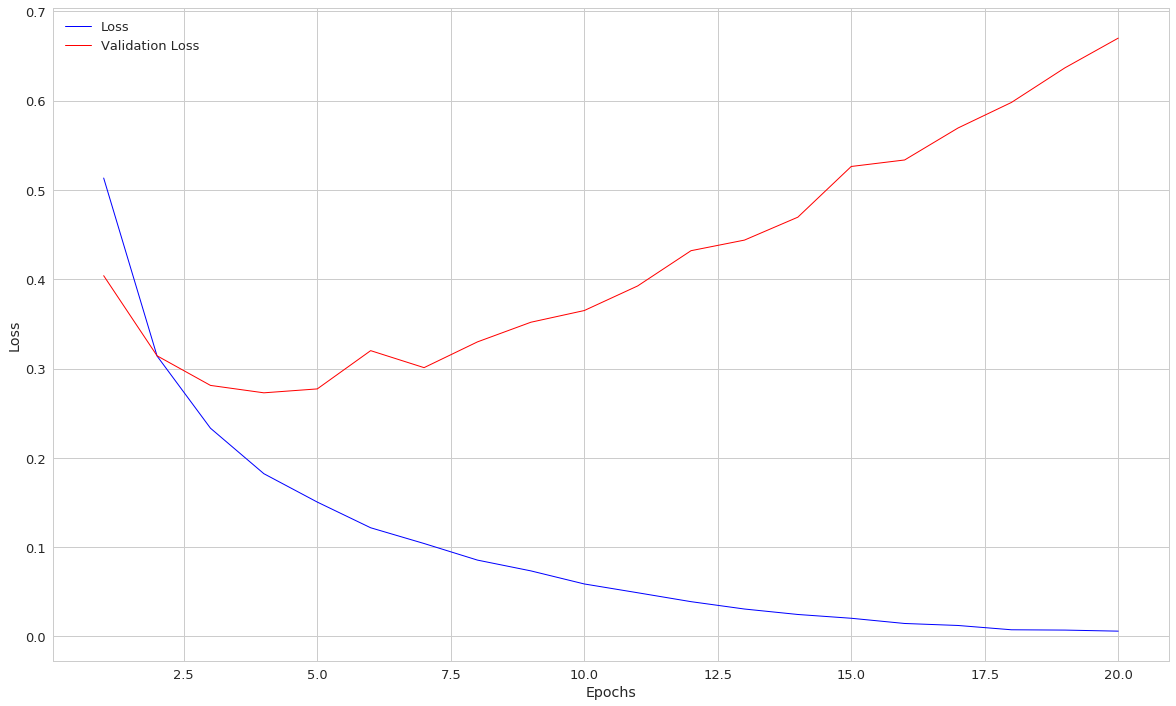

In [17]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

_ = plt.plot(epochs, loss_values, 'b', label='Loss', linewidth=linewidth)
_ = plt.plot(epochs, val_loss_values, 'r', label='Validation Loss', linewidth=linewidth)

_ = plt.xlabel('Epochs')
_ = plt.ylabel('Loss')

_ = plt.legend()

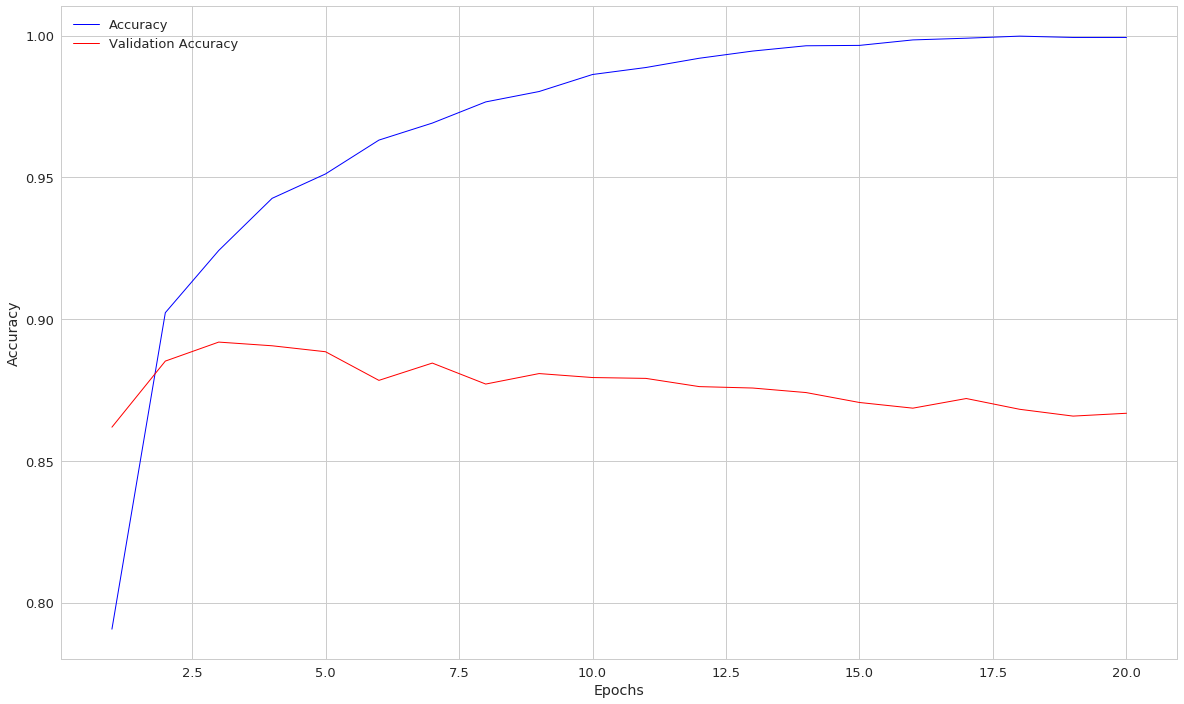

In [18]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

_ = plt.plot(epochs, acc_values, 'b', label='Accuracy', linewidth=linewidth)
_ = plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy', linewidth=linewidth)

_ = plt.xlabel('Epochs')
_ = plt.ylabel('Accuracy')

_ = plt.legend()

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 0s - loss: 0.4831 - acc: 0.8010     
Epoch 2/4
25000/25000 [==============================] - 0s - loss: 0.2680 - acc: 0.9077     
Epoch 3/4
25000/25000 [==============================] - 0s - loss: 0.2035 - acc: 0.9273     
Epoch 4/4
24416/25000 [============================>.] - ETA: 0s

[0.29142602884292601, 0.88544]

In [20]:
model.predict(x_test)

array([[ 0.91428852],
       [ 0.8515619 ],
       [ 0.99942112],
       ..., 
       [ 0.44994891],
       [ 0.00400244],
       [ 0.79751205]], dtype=float32)